In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_excel('2106-Market_Research_Raw_Data_cleaned for analysis_cleaned_Jay.xlsx', 
                   sheet_name='Cleaned with Questions', header=0)
df.head()

,Question Weight,What is your age?,What is your gender?,"space for walking/cycling, restricting parking/closing streets near schools",New protected cycle lanes on main roads,Space in shopping streets for walking and/or cycling,Space in city centre for walking and/or cycling,"Connecting existing walking/cycling routes used for leisure, by closing some roads to cars and/or providing protected space for walking and cycling on roads.","New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.",Area,how many cars or vans (own or company cars/vans) are available to members of your household?
0,1.05932,25 – 34,Female,Support,Support,Support,Support,Support,Support,North,1
1,0.74047,45 – 54,Male,Support,Support,Support,Strongly support,Support,Support,East,None
2,0.74047,45 – 54,Male,Strongly support,Strongly support,Strongly support,Strongly support,Strongly support,Strongly support,North,1
3,1.08698,35 – 44,Male,Strongly support,Strongly support,Strongly support,Strongly support,Strongly support,Strongly support,South,None
4,1.0198,65 – 74,Male,Support,Strongly support,Support,Neutral,Oppose,Neutral,South,1


In [9]:
df.set_index('Question Weight', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048574 entries, 1.05932 to Question Weight
Data columns (total 10 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                         --------------  ----- 
 0   What is your age?                                                                                                                                              585 non-null    object
 1   What is your gender?                                                                                                                                           585 non-null    object
 2   space for walking/cycling, restricting parking/closing streets near schools                                                  

In [10]:
for col in df.columns:
    df[col] = df[col].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048574 entries, 1.05932 to Question Weight
Data columns (total 10 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype   
---  ------                                                                                                                                                         --------------  -----   
 0   What is your age?                                                                                                                                              585 non-null    category
 1   What is your gender?                                                                                                                                           585 non-null    category
 2   space for walking/cycling, restricting parking/closing streets near schools                                          

In [12]:
df.Area.value_counts()

North      152
South      128
East       127
West       112
Central     64
VQ39         1
Area         1
Name: Area, dtype: int64

In [13]:
df[df.Area == 'VQ39']

,What is your age?,What is your gender?,"space for walking/cycling, restricting parking/closing streets near schools",New protected cycle lanes on main roads,Space in shopping streets for walking and/or cycling,Space in city centre for walking and/or cycling,"Connecting existing walking/cycling routes used for leisure, by closing some roads to cars and/or providing protected space for walking and cycling on roads.","New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.",Area,how many cars or vans (own or company cars/vans) are available to members of your household?
Question Weight,,,,,,,,,,
Weight,SQ3,SQ4,Q4a,Q4b,Q4c,Q4d,Q4e,Q4f,VQ39,Q40


In [14]:
codes = []

for code in df.loc['Weight']:
    codes.append(code)
codes

['SQ3', 'SQ4', 'Q4a', 'Q4b', 'Q4c', 'Q4d', 'Q4e', 'Q4f', 'VQ39', 'Q40']

In [15]:
df.replace(codes, np.nan, inplace=True)
df.replace(df.columns, np.nan, inplace=True)
df = df.dropna()
df.Area.value_counts()

North      152
South      128
East       127
West       112
Central     64
Name: Area, dtype: int64

In [16]:
df.head()

,What is your age?,What is your gender?,"space for walking/cycling, restricting parking/closing streets near schools",New protected cycle lanes on main roads,Space in shopping streets for walking and/or cycling,Space in city centre for walking and/or cycling,"Connecting existing walking/cycling routes used for leisure, by closing some roads to cars and/or providing protected space for walking and cycling on roads.","New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.",Area,how many cars or vans (own or company cars/vans) are available to members of your household?
Question Weight,,,,,,,,,,
1.05932,25 – 34,Female,Support,Support,Support,Support,Support,Support,North,1
0.74047,45 – 54,Male,Support,Support,Support,Strongly support,Support,Support,East,None
0.74047,45 – 54,Male,Strongly support,Strongly support,Strongly support,Strongly support,Strongly support,Strongly support,North,1
1.08698,35 – 44,Male,Strongly support,Strongly support,Strongly support,Strongly support,Strongly support,Strongly support,South,None
1.01980,65 – 74,Male,Support,Strongly support,Support,Neutral,Oppose,Neutral,South,1


In [17]:
df[df['What is your age?'] == 'What is your age?']

,What is your age?,What is your gender?,"space for walking/cycling, restricting parking/closing streets near schools",New protected cycle lanes on main roads,Space in shopping streets for walking and/or cycling,Space in city centre for walking and/or cycling,"Connecting existing walking/cycling routes used for leisure, by closing some roads to cars and/or providing protected space for walking and cycling on roads.","New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.",Area,how many cars or vans (own or company cars/vans) are available to members of your household?
Question Weight,,,,,,,,,,


In [18]:
df['What is your age?'].value_counts()

35 – 44        122
55 – 64        115
45 – 54        108
25 – 34         96
65 – 74         84
16 – 24         44
75 and over     14
Name: What is your age?, dtype: int64

What is your age?


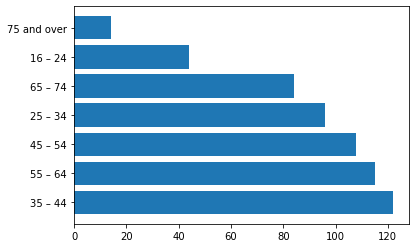

What is your gender?


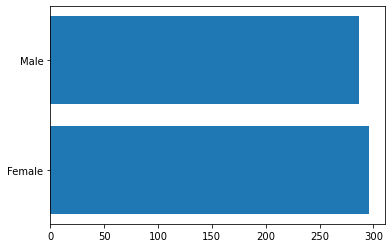

space for walking/cycling, restricting parking/closing streets near schools


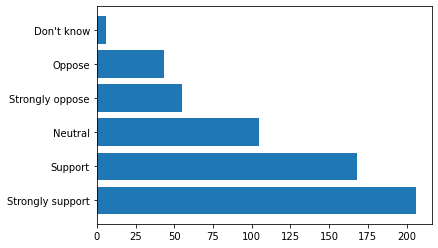

New protected cycle lanes on main roads


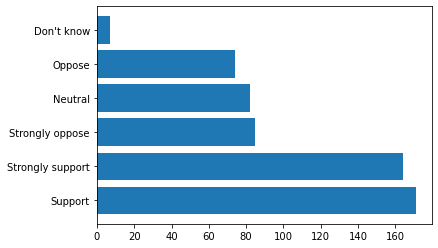

Space in shopping streets for walking and/or cycling


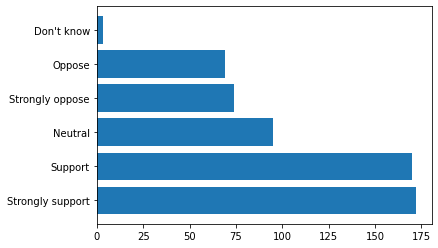

Space in city centre for walking and/or cycling


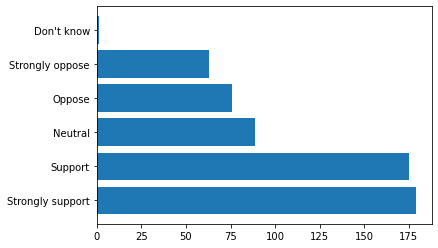

Connecting existing walking/cycling routes used for leisure, by closing some roads to cars and/or providing protected space for walking and cycling on roads.


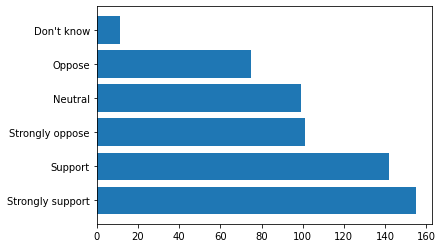

New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.


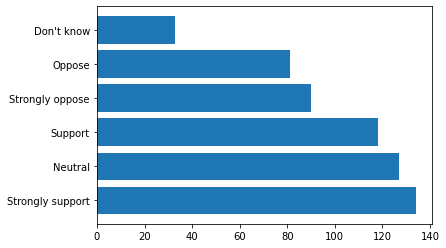

Area


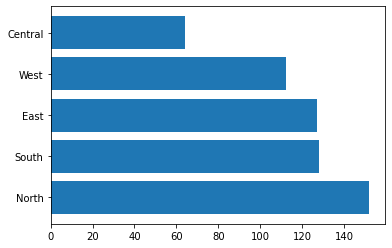

how many cars or vans (own or company cars/vans) are available to members of your household?


TypeError: the dtypes of parameters y (object) and height (float64) are incompatible

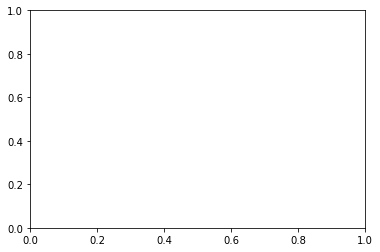

In [19]:
for col in df.columns:
    print(col)
    plt.barh(df[col].value_counts().index, df[col].value_counts())
    plt.show()

What is your age?


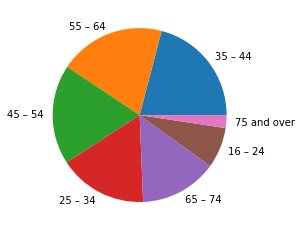

What is your gender?


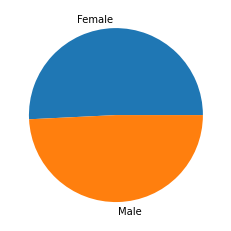

space for walking/cycling, restricting parking/closing streets near schools


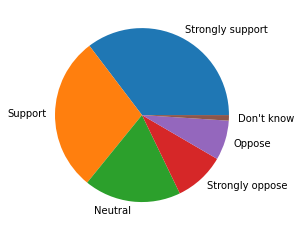

New protected cycle lanes on main roads


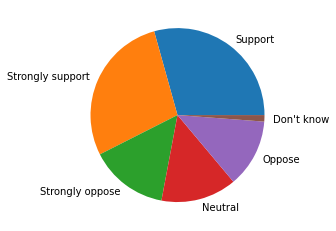

Space in shopping streets for walking and/or cycling


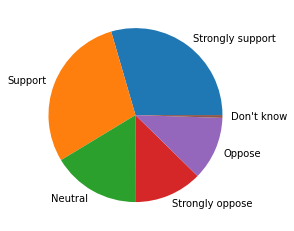

Space in city centre for walking and/or cycling


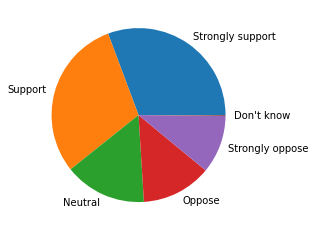

Connecting existing walking/cycling routes used for leisure, by closing some roads to cars and/or providing protected space for walking and cycling on roads.


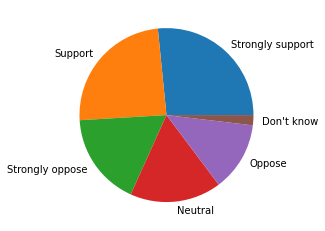

New signed ‘quiet connections’ for day to day cycling, with road closures to reduce traffic.


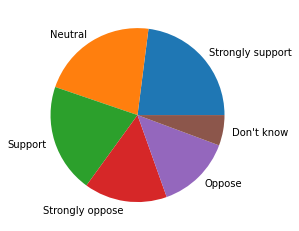

Area


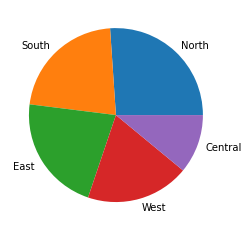

how many cars or vans (own or company cars/vans) are available to members of your household?


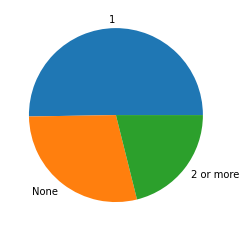

In [20]:
for col in df.columns:
    print(col)
    plt.pie(df[col].value_counts(), labels=df[col].value_counts().index)
    plt.show()